In [3]:
# Stock market prices are highly unpredictable and volatile. This means that there are no 
# consistent patterns in the data that allow you to model stock prices over time near-perfectly.

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv
User uploaded file "Google_Stock_Price_Test.csv" with length 1029 bytes


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv
User uploaded file "Google_Stock_Price_Train.csv" with length 63488 bytes


In [5]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)





Using TensorFlow backend.


Epoch 1/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0417
Epoch 2/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0058
Epoch 3/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0058
Epoch 5/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [============================

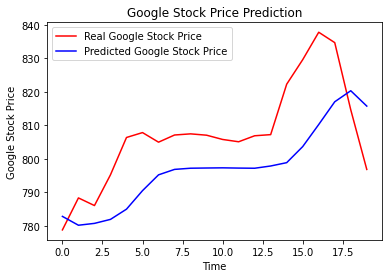

In [6]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



In [7]:
predicted_stock_price

array([[782.84485],
       [780.20874],
       [780.76215],
       [781.95294],
       [785.00543],
       [790.52954],
       [795.24744],
       [796.87366],
       [797.2257 ],
       [797.2875 ],
       [797.33844],
       [797.2646 ],
       [797.21783],
       [797.88983],
       [798.88245],
       [803.67896],
       [810.2725 ],
       [817.05646],
       [820.3521 ],
       [815.7684 ]], dtype=float32)